In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Preparation of fmri data

In [2]:
#List of the subjects' numbers
subject_numbers = [3,5,6,7]
# subject_numbers = [i for i in range(2, 50)]

fmri_file_paths= {}
for i in subject_numbers:
    # fmri_file_paths[f'fmri_file_paths_0{i}']= [rf"E:\fMRI_FINAL_FOLDER\BOLD_DATA\sub-pixar{i:03d}_task-pixar_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz"]
    fmri_file_paths[f'fmri_file_paths_0{i}']= [rf"D:\fMRI_FINAL_FOLDER\BOLD_DATA_2\sub-0{i}_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz", rf"D:\fMRI_FINAL_FOLDER\BOLD_DATA_2\sub-0{i}_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz"]
fmri_file_paths

{'fmri_file_paths_03': ['D:\\fMRI_FINAL_FOLDER\\BOLD_DATA_2\\sub-03_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz',
  'D:\\fMRI_FINAL_FOLDER\\BOLD_DATA_2\\sub-03_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz'],
 'fmri_file_paths_05': ['D:\\fMRI_FINAL_FOLDER\\BOLD_DATA_2\\sub-05_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz',
  'D:\\fMRI_FINAL_FOLDER\\BOLD_DATA_2\\sub-05_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz'],
 'fmri_file_paths_06': ['D:\\fMRI_FINAL_FOLDER\\BOLD_DATA_2\\sub-06_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz',
  'D:\\fMRI_FINAL_FOLDER\\BOLD_DATA_2\\sub-06_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz'],
 'fmri_file_paths_07': ['D:\\fMRI_FINAL_FOLDER\\BOLD_DATA_2\\sub-07_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz',
  'D:\\fMRI_FINAL_FOLDER\\B

In [3]:
time_series = {}
for i in subject_numbers:
    # Data extraction for each fMRI run
    fmri_run1_path = fmri_file_paths[f'fmri_file_paths_0{i}'][0]
    fmri_run2_path = fmri_file_paths[f'fmri_file_paths_0{i}'][1]
    
    # Loading fMRI files
    fmri_run1 = nib.load(fmri_run1_path).get_fdata()
    fmri_run2 = nib.load(fmri_run2_path).get_fdata()
    
    # Using squeeze to remove size 1 dimensions
    fmri_run1_squeezed = np.squeeze(fmri_run1) 
    fmri_run2_squeezed = np.squeeze(fmri_run2) 
    
    # Concatenation of the time series of the two runs
    # time_series[f'time_series_0{i}'] = [fmri_run1_squeezed]
    time_series[f'time_series_0{i}'] = [fmri_run1_squeezed, fmri_run2_squeezed]
    print(f'time_series_0{i} shape: {time_series[f"time_series_0{i}"][0].shape}')  # Print the shape of the time series



time_series_03 shape: (20413, 800)
time_series_05 shape: (20413, 799)
time_series_06 shape: (20413, 799)
time_series_07 shape: (20413, 800)


Test avec mes données, sensé donner une shape (9080, 800)

In [ ]:
# time_series = {}

# # Data extraction for each fMRI run
# fmri_run1_path = r"G:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\extracted_voxels\sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz"
# # fmri_run2_path = r'C:\Users\Rémi\Desktop\australie\codes\Lucas\BOLD_DATA\BIDS\sub-03\func\files_AP_MB4_BOLD_Risk2_20230814084543_13.nii.gz'

# # Loading fMRI files
# fmri_run1 = nib.load(fmri_run1_path).get_fdata()
# #fmri_run2 = nib.load(fmri_run2_path).get_fdata()

# # Using squeeze to remove size 1 dimensions
# fmri_run1_squeezed = np.squeeze(fmri_run1) 
# #fmri_run2_squeezed = np.squeeze(fmri_run2) 

# # Concatenation of the time series of the two runs
# # time_series['file path'] = [fmri_run1_squeezed, fmri_run2_squeezed]
# time_series['file path'] = [fmri_run1_squeezed]

In [6]:
time_series['file path'][0].shape

KeyError: 'file path'

In [8]:
time_series['time_series_03'][1].shape

(20413, 770)

In [4]:
events = {}
for i in subject_numbers:
    events1 = pd.read_csv(rf"E:\experiment\event_run1.csv")
    events2 = pd.read_csv(rf"E:\experiment\event_run2.csv")
    # events1 = pd.read_csv(r"G:\fMRI_FINAL_FOLDER\BOLD_DATA\pixar_events_bis.tsv", sep='\t')
    events[f'events_0{i}'] = [events1, events2]
    # events[f'events_0{i}'] = [events1]
events['events_03'][0]

,type,onset,duration,nb_images,video_name
0,control,0.00,7.00,7,control 2 - video 5 _1.mp4
1,NonRisk,7.00,24.67,25,part 2 - 12 video 8_Trim.mp4
2,control,31.67,8.00,8,control 2 - video 1 _ 1.mp4
3,NonRisk,39.67,13.83,14,control 2 - video 4 _2_Trim.mp4
4,control,53.50,8.00,8,control 2 - video 4 _3_Trim.mp4
...,...,...,...,...,...
66,control,724.70,8.00,8,6 - weekly 8.mp4
67,NonRisk,732.70,19.73,20,8 - weekly 1.mp4
68,control,752.43,8.00,8,8 - weekly 2.mp4
69,NonRisk,760.43,19.07,19,controle_add1


In [5]:
events['events_07'][0]

,type,onset,duration,nb_images,video_name
0,control,0.00,7.00,7,control 2 - video 5 _1.mp4
1,NonRisk,7.00,24.67,25,part 2 - 12 video 8_Trim.mp4
2,control,31.67,8.00,8,control 2 - video 1 _ 1.mp4
3,NonRisk,39.67,13.83,14,control 2 - video 4 _2_Trim.mp4
4,control,53.50,8.00,8,control 2 - video 4 _3_Trim.mp4
...,...,...,...,...,...
66,control,724.70,8.00,8,6 - weekly 8.mp4
67,NonRisk,732.70,19.73,20,8 - weekly 1.mp4
68,control,752.43,8.00,8,8 - weekly 2.mp4
69,NonRisk,760.43,19.07,19,controle_add1


In [9]:
# TR = 1  # Repeat time in seconds, adjust according to your data
TR = 2  # Repeat time in seconds, adjust according to your data

delay_seconds = 6  # Time to see the effect of stimulations
delay_points = delay_seconds / TR  # Number of data points corresponding to the delay


def label_time_series(num_sub):

    l =[]
    # Go through each segment to extract features
    for i in range(2):
        # Initializing the list to store features and labels
        labels = []
        ts = []
        video_name = []
        for _, row in events[f'events_0{num_sub}'][i].iterrows():
            onset_time = row['onset'] + delay_seconds
            trial_type = row['type']


            #adjusted_onset_time = onset_time
            start_index = int(onset_time / TR)  # Convert onset to data point index
            # end_index = start_index + int(row['nb_images'])  # Determine the end index of the segment
            end_index = start_index + int(row['duration'] / TR)
            
            segment = time_series[f'time_series_0{num_sub}'][i][:, start_index:end_index]
            ts.append(segment)
            labels.append(trial_type)
            video_name.append(row['video_name'])

        data = {'labels' : labels, 'time_series' : ts, 'video_name' : video_name}
        # data = {'labels' : labels, 'time_series' : ts}

        df = pd.DataFrame(data)
        l.append(df)

    return l

In [6]:
TR = 1  # Repeat time in seconds, adjust according to your data
delay_seconds = 6  # Time to see the effect of stimulations
delay_points = delay_seconds / TR  # Number of data points corresponding to the delay


def label_time_series(num_sub):

    l =[]
    # Go through each segment to extract features
    for i in range(2):
        # Initializing the list to store features and labels
        labels = []
        ts = []
        video_name = []
        for _, row in events[f'events_0{num_sub}'][i].iterrows():
            onset_time = row['onset'] + delay_seconds
            trial_type = row['type']


            #adjusted_onset_time = onset_time
            start_index = int(onset_time / TR)  # Convert onset to data point index
            end_index = start_index + int(row['nb_images'])  # Determine the end index of the segment
            
            segment = time_series[f'time_series_0{num_sub}'][i][:, start_index:end_index]
            ts.append(segment)
            labels.append(trial_type)
            video_name.append(row['video_name'])

        data = {'labels' : labels, 'time_series' : ts, 'video_name' : video_name}
        df = pd.DataFrame(data)
        l.append(df)

    return l

In [7]:
time_series_labels = {}

for subj_num in subject_numbers:
    time_series_labels[f'time_series_0{subj_num}'] = label_time_series(subj_num)

In [8]:
time_series_labels['time_series_03'][0]

,labels,time_series,video_name
0,control,"[[616.5716552734375, 630.994384765625, 618.949...",control 2 - video 5 _1.mp4
1,NonRisk,"[[624.8204956054688, 625.0413818359375, 627.09...",part 2 - 12 video 8_Trim.mp4
2,control,"[[632.2094116210938, 626.6030883789062, 641.28...",control 2 - video 1 _ 1.mp4
3,NonRisk,"[[634.0695190429688, 631.7698974609375, 642.97...",control 2 - video 4 _2_Trim.mp4
4,control,"[[633.4608154296875, 633.9348754882812, 635.64...",control 2 - video 4 _3_Trim.mp4
...,...,...,...
66,control,"[[643.1314086914062, 626.2470703125, 627.62951...",6 - weekly 8.mp4
67,NonRisk,"[[627.5518798828125, 634.9557495117188, 630.61...",8 - weekly 1.mp4
68,control,"[[632.2525634765625, 630.6882934570312, 623.94...",8 - weekly 2.mp4
69,NonRisk,"[[629.59423828125, 638.7833251953125, 628.9680...",controle_add1


In [9]:
# Add a column with the number of points of the time series
for subj in time_series_labels:
    for i in range(2):
        time_series_labels[subj][i]['pts_nb'] = time_series_labels[subj][i]['time_series'].apply(lambda x: x.shape[1])



In [10]:
df_ts = time_series_labels['time_series_07'][1]
df_ts

,labels,time_series,video_name,pts_nb
0,control,"[[625.5345458984375, 625.4281616210938, 635.00...",control 2 - video 5 _1.mp4,7
1,NonRisk,"[[630.268310546875, 637.5045776367188, 627.614...",part 2 - 12 video 8_Trim.mp4,16
2,control,"[[634.0298461914062, 628.9321899414062, 629.61...",control 2 - video 1 _ 1.mp4,8
3,NonRisk,"[[638.8134765625, 631.1389770507812, 634.66046...",control 2 - video 4 _2_Trim.mp4,10
4,control,"[[631.1761474609375, 629.6388549804688, 626.99...",control 2 - video 4 _3_Trim.mp4,8
...,...,...,...,...
66,control,"[[624.189453125, 635.26220703125, 630.02178955...",6 - weekly 8.mp4,8
67,Risk,"[[627.0821533203125, 625.9744873046875, 637.64...",8 - weekly 1.mp4,8
68,control,"[[628.3837890625, 629.4358520507812, 621.48120...",8 - weekly 2.mp4,8
69,NonRisk,"[[616.8518676757812, 627.015625, 623.982421875...",controle_add1,13


In [11]:
df_ts.iloc[0]['time_series']

array([[625.5345459 , 625.42816162, 635.00250244, ..., 625.67333984,
        631.67718506, 629.08398438],
       [564.09338379, 551.54522705, 559.94366455, ..., 561.25457764,
        564.81164551, 558.99212646],
       [661.53656006, 651.79632568, 654.15185547, ..., 648.90240479,
        664.67266846, 647.39562988],
       ...,
       [635.71929932, 637.48675537, 633.89227295, ..., 645.54241943,
        633.62341309, 640.77886963],
       [675.24505615, 666.52191162, 665.32769775, ..., 683.38037109,
        664.80480957, 675.10522461],
       [565.6918335 , 574.51531982, 576.0793457 , ..., 589.40386963,
        573.1541748 , 574.58294678]], shape=(20413, 7))

With the module GLM Single

First try: 1 type of stimulation for the GLM (only 1 regressor)

In [13]:
# from glmsingle import GLM_single
# from nilearn.glm.first_level import compute_regressor


# # Définir les paramètres globaux
# stimdur =  0.1 # Durée du stimulus en secondes (exemple)
# tr = 1  # Temps de répétition en secondes (exemple)

# # Fonction pour créer des onsets et des durations
# def create_onsets_durations(run_df):
#     onsets = []
#     current_idx = 0
#     for i, row in run_df.iterrows():
#         if row['labels'] in ['NonRisk', 'Risk']:
#             onsets.extend(list(range(current_idx, current_idx + row['pts_nb'])))
#         current_idx += row['pts_nb']
#     return onsets

# # Fonction pour créer une matrice de design binaire pour chaque run
# def create_design_matrices(run_dfs):
#     design_matrices = []
#     for run_df in run_dfs:
#         total_length = sum(run_df['pts_nb'])
#         design_matrix = np.zeros((total_length, 1))
#         onsets = create_onsets_durations(run_df)
#         for onset in onsets:
#             design_matrix[onset, 0] = 1
#         design_matrices.append(design_matrix)
#     return design_matrices

# # Créer les matrices de design pour chaque sujet
# design_matrices = {
#     subject: create_design_matrices(run_dfs)
#     for subject, run_dfs in time_series_labels.items()
# }

# # Préparer les données fMRI en concaténant toutes les séries temporelles pour chaque run
# def prepare_fmri_data(run_dfs):
#     fmri_runs = []
#     for run_df in run_dfs:
#         all_time_series = np.concatenate(run_df['time_series'].values, axis=1)
#         fmri_runs.append(all_time_series)
#     return fmri_runs

# # Préparer les données fMRI pour chaque sujet
# fmri_data = {
#     subject: prepare_fmri_data(run_dfs)
#     for subject, run_dfs in time_series_labels.items()
# }

# # Exécuter GLMSingle pour chaque sujet
# # Initialiser GLMSingle avec les options supportées
# options = dict()
# glm = GLM_single(options)

# # Ajuster GLM pour chaque sujet
# results = {}
# for subject in fmri_data:
#     results[subject] = glm.fit(
#         design_matrices[subject],  # Matrices de design correspondantes
#         fmri_data[subject],  # Données fMRI pour le sujet
#         stimdur,  # Durée du stimulus
#         tr  # Temps de répétition
#     )

*** DIAGNOSTICS ***:
There are 2 runs.
The number of conditions in this experiment is 1.
The stimulus duration corresponding to each trial is 0.10 seconds.
The TR (time between successive data points) is 1.00 seconds.
The number of trials in each run is: [501, 467].
The number of trials for each condition is: [968].
For each condition, the number of runs in which it appears: [2].
For each run, how much ending buffer do we have in seconds? [8, 8].
*** Saving design-related results to c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\MindBridge\src\MyDataPrep\GLMestimatesingletrialoutputs\DESIGNINFO.npy. ***
*** FITTING DIAGNOSTIC RUN-WISE FIR MODEL ***
*** Saving FIR results to c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\MindBridge\src\MyDataPrep\GLMestimatesingletrialoutputs\RUNWISEFIR.npy. ***

*** FITTING TYPE-A MODEL (ONOFF) ***

fitting model...
done.

preparing output...
done.

computing model fits...
done.

computing R^2...
done.

computing SNR...


chunks: 100%|██████████| 1/1 [00:46<00:00, 46.36s/it]



*** Saving results to c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\MindBridge\src\MyDataPrep\GLMestimatesingletrialoutputs\TYPEB_FITHRF.npy. ***

*** DETERMINING GLMDENOISE REGRESSORS ***

*** CROSS-VALIDATING DIFFERENT NUMBERS OF REGRESSORS ***



chunks: 100%|██████████| 1/1 [04:36<00:00, 276.38s/it]



*** FITTING TYPE-C MODEL (GLMDENOISE) ***



chunks: 100%|██████████| 1/1 [00:21<00:00, 21.09s/it]



*** Saving results to c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\MindBridge\src\MyDataPrep\GLMestimatesingletrialoutputs\TYPEC_FITHRF_GLMDENOISE.npy. ***

*** FITTING TYPE-D MODEL (GLMDENOISE_RR) ***



chunks: 100%|██████████| 1/1 [10:56<00:00, 656.12s/it]


*** Saving results to c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\MindBridge\src\MyDataPrep\GLMestimatesingletrialoutputs\TYPED_FITHRF_GLMDENOISE_RR.npy. ***

*** All model types done ***

*** return model types in results ***



In [14]:
design_matrices['time_series_03'][0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

Second try: 1 regressor for each video

In [127]:
# from glmsingle import GLM_single
# import numpy as np

# # Définir les paramètres globaux
# stimdur = 0.1  # Durée du stimulus en secondes (exemple)
# tr = 1  # Temps de répétition en secondes (exemple)

# # Fonction pour créer des onsets et des durations
# def create_onsets_durations(run_df):
#     onsets = []
#     video_names = []
#     current_idx = 0
#     for i, row in run_df.iterrows():
#         if row['labels'] in ['NonRisk', 'Risk']:
#             onsets.extend(list(range(current_idx, current_idx + row['pts_nb'])))
#             video_names.extend([row['video_name']] * row['pts_nb'])
#         current_idx += row['pts_nb']
#     return onsets, video_names

# # Fonction pour créer une matrice de design avec un régresseur pour chaque vidéo
# def create_design_matrix(run_df, all_videos):
#     total_length = sum(run_df['pts_nb'])
#     design_matrix = np.zeros((total_length, len(all_videos)))
#     onsets, video_names = create_onsets_durations(run_df)
#     video_to_idx = {video: idx for idx, video in enumerate(all_videos)}
    
#     for onset, video_name in zip(onsets, video_names):
#         if video_name in video_to_idx:
#             design_matrix[onset, video_to_idx[video_name]] = 1
            
#     return design_matrix

# # Fonction pour récupérer toutes les vidéos de tous les runs
# def get_all_videos(run_dfs):
#     all_videos = set()
#     for run_df in run_dfs:
#         all_videos.update(run_df['video_name'].unique())
#     return sorted(list(all_videos))

# # Créer les matrices de design pour chaque run de chaque sujet
# def create_design_matrices(run_dfs):
#     all_videos = get_all_videos(run_dfs)
#     design_matrices = []
#     for run_df in run_dfs:
#         design_matrix = create_design_matrix(run_df, all_videos)
#         design_matrices.append(design_matrix)
#     return design_matrices

# # Créer les matrices de design pour chaque sujet
# design_matrices = {
#     subject: create_design_matrices(run_dfs)
#     for subject, run_dfs in time_series_labels.items()
# }

# # Préparer les données fMRI en concaténant toutes les séries temporelles pour chaque run
# def prepare_fmri_data(run_dfs):
#     fmri_runs = []
#     for run_df in run_dfs:
#         all_time_series = np.concatenate(run_df['time_series'].values, axis=1)
#         fmri_runs.append(all_time_series)
#     return fmri_runs

# # Préparer les données fMRI pour chaque sujet
# fmri_data = {
#     subject: prepare_fmri_data(run_dfs)
#     for subject, run_dfs in time_series_labels.items()
# }

# # Exécuter GLMSingle pour chaque sujet
# # Initialiser GLMSingle avec les options supportées
# options = dict()
# glm = GLM_single(options)

# # Ajuster GLM pour chaque sujet
# results = {}
# for subject in fmri_data:
#     results[subject] = glm.fit(
#         design_matrices[subject],  # Matrices de design correspondantes
#         fmri_data[subject],  # Données fMRI pour le sujet
#         stimdur,  # Durée du stimulus
#         tr  # Temps de répétition
#     )


*** DIAGNOSTICS ***:
There are 2 runs.
The number of conditions in this experiment is 71.
The stimulus duration corresponding to each trial is 0.10 seconds.
The TR (time between successive data points) is 1.00 seconds.
The number of trials in each run is: [501, 467].
The number of trials for each condition is: [11, 7, 24, 21, 17, 20, 14, 10, 8, 19, 23, 25, 25, 21, 19, 18, 14, 21, 15, 11, 7, 9, 7, 7, 14, 9, 6, 10, 9, 10, 10, 14, 17, 19, 10, 0, 15, 15, 18, 17, 18, 15, 13, 14, 16, 15, 19, 16, 15, 8, 7, 13, 8, 11, 14, 9, 17, 9, 10, 7, 8, 7, 9, 6, 12, 13, 17, 40, 16, 11, 9].
For each condition, the number of runs in which it appears: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1].
For each run, how much ending buffer do we have in seconds? [8, 8].
*** Saving design-related results to c:\Users\hennecol\Documents\FMRI experiment

c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\virtual_environnement\carrs-q_projectv2\Lib\site-packages\glmsingle\glmsingle.py:665: UserWarning: None of your conditions occur in more than one run. Are you sure this is what you intend?
  warnings.warn(msg)
c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\virtual_environnement\carrs-q_projectv2\Lib\site-packages\glmsingle\glmsingle.py:670: UserWarning: Since there are no repeats, standard cross-validation usage of <wantglmdenoise> cannot be performed. Setting <wantglmdenoise> to 0.
  warnings.warn(msg)
c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\virtual_environnement\carrs-q_projectv2\Lib\site-packages\glmsingle\glmsingle.py:676: UserWarning: Since there are no repeats, standard cross-validation usage of <wantfracridge> cannot be performed. Setting <wantfracridge> to 0.
  warnings.warn(msg)


*** Saving FIR results to c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\MindBridge\src\MyDataPrep\GLMestimatesingletrialoutputs\RUNWISEFIR.npy. ***

*** FITTING TYPE-A MODEL (ONOFF) ***

fitting model...
done.

preparing output...
done.

computing model fits...
done.

computing R^2...
done.

computing SNR...
done.


*** Saving results to c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\MindBridge\src\MyDataPrep\GLMestimatesingletrialoutputs\TYPEA_ONOFF.npy. ***

*** Setting brain R2 threshold to 0.4735491986329307 ***

*** FITTING TYPE-B MODEL (FITHRF) ***



chunks: 100%|██████████| 1/1 [00:44<00:00, 44.37s/it]


*** Saving results to c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\MindBridge\src\MyDataPrep\GLMestimatesingletrialoutputs\TYPEB_FITHRF.npy. ***

*** All model types done ***

*** return model types in results ***



In [126]:
design_matrices['time_series_03'][0][7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

Single Trial betas: one regressor for each point of a video

In [12]:
from glmsingle import GLM_single
import numpy as np
import pandas as pd

# Définir les paramètres globaux
stimdur = 0.1  # Durée du stimulus en secondes (exemple)
tr = 1  # Temps de répétition en secondes (exemple)

# Fonction pour créer des onsets pour chaque point des vidéos 'Risk' et 'NonRisk'
def create_onsets_durations(run_dfs):
    onsets = []
    current_idx = 0
    for run_df in run_dfs:
        for i, row in run_df.iterrows():
            if row['labels'] in ['NonRisk', 'Risk']:
            # if row['labels'] in ['ToM', 'Pain']:

                onsets.extend(list(range(current_idx, current_idx + row['pts_nb'])))
            current_idx += row['pts_nb']
    print("Onsets:", onsets)
    return onsets

# Fonction pour créer une matrice de design avec un régresseur pour chaque point des vidéos 'Risk' et 'NonRisk'
def create_design_matrix(run_dfs):
    total_length = sum(run_df['pts_nb'].sum() for run_df in run_dfs)
    num_trials = sum(row['pts_nb'] for run_df in run_dfs for i, row in run_df.iterrows() if row['labels'] in ['NonRisk', 'Risk'])
    # num_trials = sum(row['pts_nb'] for run_df in run_dfs for i, row in run_df.iterrows() if row['labels'] in ['ToM', 'Pain'])

    design_matrix = np.zeros((total_length, num_trials))
    onsets = create_onsets_durations(run_dfs)
    
    for i, onset in enumerate(onsets):
        design_matrix[onset, i] = 1
    
    return design_matrix

# Créer les matrices de design pour chaque sujet
design_matrices = {
    subject: create_design_matrix(run_dfs)
    for subject, run_dfs in time_series_labels.items()
}

# Préparer les données fMRI en concaténant toutes les séries temporelles pour chaque run
def prepare_fmri_data(run_dfs):
    fmri_runs = []
    for run_df in run_dfs:
        all_time_series = np.concatenate(run_df['time_series'].values, axis=1)
        fmri_runs.append(all_time_series)
    return np.concatenate(fmri_runs, axis=1)

# Préparer les données fMRI pour chaque sujet
fmri_data = {
    subject: prepare_fmri_data(run_dfs)
    for subject, run_dfs in time_series_labels.items()
}

# Exécuter GLMSingle pour chaque sujet
# Initialiser GLMSingle avec les options supportées
options = dict()
glm = GLM_single(options)

# Ajuster GLM pour chaque sujet
results = {}
for subject in fmri_data:
    results[subject] = glm.fit(
        [design_matrices[subject]],  # Matrices de design correspondantes
        [fmri_data[subject]],  # Données fMRI pour le sujet
        stimdur,  # Durée du stimulus
        tr  # Temps de répétition
    )

Onsets: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 62, 63, 64, 65, 66, 67, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 123, 124, 125, 126, 127, 128, 129, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 247, 248, 249, 250, 251, 252, 253, 262, 263, 264, 265, 266, 267, 268, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 322, 323, 324, 325, 326, 327, 328, 329, 

c:\Users\billah\AppData\Local\Programs\Python\Python312\Lib\site-packages\glmsingle\glmsingle.py:657: UserWarning: None of your conditions occur in more than one run. Are you sure this is what you intend?
  warnings.warn(msg)
c:\Users\billah\AppData\Local\Programs\Python\Python312\Lib\site-packages\glmsingle\glmsingle.py:667: UserWarning: Since there are no repeats, standard cross-validation usage of <wantglmdenoise> cannot be performed. Setting <wantglmdenoise> to 0.
  warnings.warn(msg)
c:\Users\billah\AppData\Local\Programs\Python\Python312\Lib\site-packages\glmsingle\glmsingle.py:674: UserWarning: Since there are no repeats, standard cross-validation usage of <wantfracridge> cannot be performed. Setting <wantfracridge> to 0.
  warnings.warn(msg)


*** Saving FIR results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\RUNWISEFIR.npy. ***

*** FITTING TYPE-A MODEL (ONOFF) ***

fitting model...
done.

preparing output...
done.

computing model fits...
done.

computing R^2...
done.

computing SNR...
done.


*** Saving results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\TYPEA_ONOFF.npy. ***

*** Setting brain R2 threshold to 0.4362401430691584 ***

*** FITTING TYPE-B MODEL (FITHRF) ***



chunks: 100%|██████████| 1/1 [00:41<00:00, 41.82s/it]



*** Saving results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\TYPEB_FITHRF.npy. ***

*** All model types done ***

*** return model types in results ***

*** DIAGNOSTICS ***:
There are 1 runs.
The number of conditions in this experiment is 968.
The stimulus duration corresponding to each trial is 0.10 seconds.
The TR (time between successive data points) is 1.00 seconds.
The number of trials in each run is: [968].
The number of trials for each condition is: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), n

c:\Users\billah\AppData\Local\Programs\Python\Python312\Lib\site-packages\glmsingle\glmsingle.py:651: UserWarning: Warning: You have specified trial onsets that occur less than 8 seconds from the end of at least one of the runs. This may cause estimation problems! As a solution, consider simply omitting specification of these ending trials from the original design matrix.
  warnings.warn(msg)
c:\Users\billah\AppData\Local\Programs\Python\Python312\Lib\site-packages\glmsingle\glmsingle.py:657: UserWarning: None of your conditions occur in more than one run. Are you sure this is what you intend?
  warnings.warn(msg)


*** Saving FIR results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\RUNWISEFIR.npy. ***

*** FITTING TYPE-A MODEL (ONOFF) ***

fitting model...
done.

preparing output...
done.

computing model fits...
done.

computing R^2...
done.

computing SNR...
done.


*** Saving results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\TYPEA_ONOFF.npy. ***

*** FITTING TYPE-B MODEL (FITHRF) ***



chunks: 100%|██████████| 1/1 [00:39<00:00, 39.88s/it]



*** Saving results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\TYPEB_FITHRF.npy. ***

*** All model types done ***

*** return model types in results ***

*** DIAGNOSTICS ***:
There are 1 runs.
The number of conditions in this experiment is 968.
The stimulus duration corresponding to each trial is 0.10 seconds.
The TR (time between successive data points) is 1.00 seconds.
The number of trials in each run is: [968].
The number of trials for each condition is: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), n

c:\Users\billah\AppData\Local\Programs\Python\Python312\Lib\site-packages\glmsingle\glmsingle.py:657: UserWarning: None of your conditions occur in more than one run. Are you sure this is what you intend?
  warnings.warn(msg)


*** Saving FIR results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\RUNWISEFIR.npy. ***

*** FITTING TYPE-A MODEL (ONOFF) ***

fitting model...
done.

preparing output...
done.

computing model fits...
done.

computing R^2...
done.

computing SNR...
done.


*** Saving results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\TYPEA_ONOFF.npy. ***

*** FITTING TYPE-B MODEL (FITHRF) ***



chunks: 100%|██████████| 1/1 [00:39<00:00, 39.52s/it]



*** Saving results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\TYPEB_FITHRF.npy. ***

*** All model types done ***

*** return model types in results ***

*** DIAGNOSTICS ***:
There are 1 runs.
The number of conditions in this experiment is 968.
The stimulus duration corresponding to each trial is 0.10 seconds.
The TR (time between successive data points) is 1.00 seconds.
The number of trials in each run is: [968].
The number of trials for each condition is: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), n

c:\Users\billah\AppData\Local\Programs\Python\Python312\Lib\site-packages\glmsingle\glmsingle.py:657: UserWarning: None of your conditions occur in more than one run. Are you sure this is what you intend?
  warnings.warn(msg)


*** Saving FIR results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\RUNWISEFIR.npy. ***

*** FITTING TYPE-A MODEL (ONOFF) ***

fitting model...
done.

preparing output...
done.

computing model fits...
done.

computing R^2...
done.

computing SNR...
done.


*** Saving results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\TYPEA_ONOFF.npy. ***



c:\Users\billah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


*** FITTING TYPE-B MODEL (FITHRF) ***



chunks: 100%|██████████| 1/1 [00:39<00:00, 39.48s/it]



*** Saving results to d:\Lucas\code\MyDataPrep\GLMestimatesingletrialoutputs\TYPEB_FITHRF.npy. ***

*** All model types done ***

*** return model types in results ***



In [13]:
design_matrices['time_series_03'][7,0]

np.float64(1.0)

In [14]:
results['time_series_03']['typeb']['betasmd'].shape

(20413, 1, 1, 968)

Change the fitting type according to the output of GLMSingle

In [15]:
fitting_type = "typeb"

In [16]:
#For GLM Single only
results['time_series_03'][fitting_type]['betasmd'].shape

(20413, 1, 1, 968)

In [17]:
#For GLMSingle only
results_d = results['time_series_03'][fitting_type]


R2 = results_d['R2']
R2run = results_d['R2run']
#glmbadness = results_d['glmbadness']
#rrbadness = results_d['rrbadness']
HRFindex = results_d['HRFindex']
HRFindexrun = results_d['HRFindexrun']
#xvaltrend = results_d['xvaltrend']
meanvol = results_d['meanvol']
#FRACvalue = results_d['FRACvalue']
#scaleoffset = results_d['scaleoffset']


(20413,)
[59.217045 60.156906 60.40532  ... 93.01557  93.30344  94.31752 ]


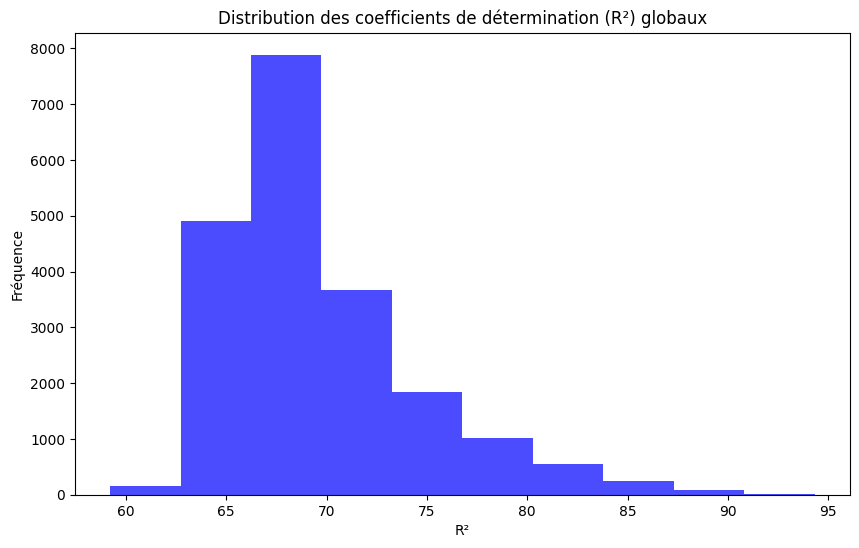

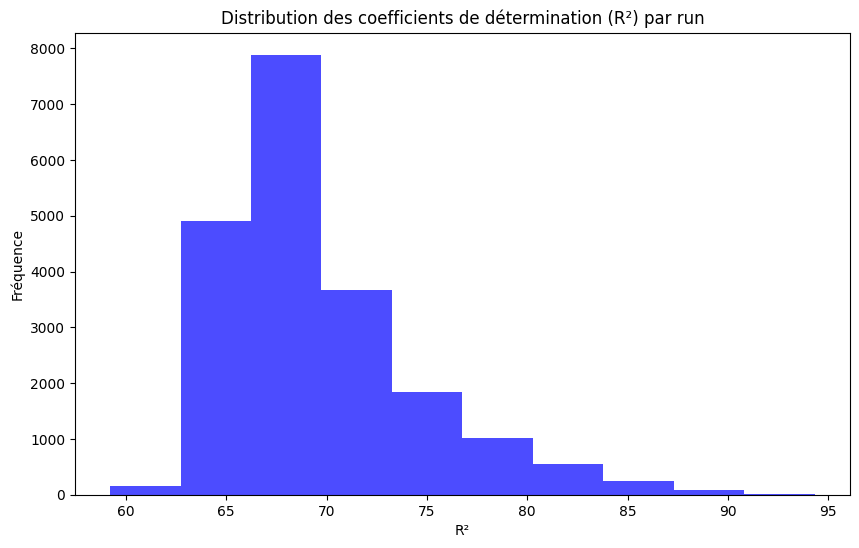

In [19]:
#For GLMSingleOnly
import numpy as np
import matplotlib.pyplot as plt

# Aplatir les données R2 et R2run
R2_flat = R2.flatten()
R2run_flat = R2run.flatten()
print(R2_flat.shape)
print(np.unique(R2_flat))

# Exemple de visualisation pour les R² globaux
plt.figure(figsize=(10, 6))
# plt.hist(R2_flat, bins=50, color='blue', alpha=0.7)
plt.hist(R2_flat, bins=min(10, len(np.unique(R2_flat))), color='blue', alpha=0.7)
plt.title('Distribution des coefficients de détermination (R²) globaux')
plt.xlabel('R²')
plt.ylabel('Fréquence')
# plt.xlim(0, 6)
plt.show()

# Exemple de visualisation pour les R² par run
plt.figure(figsize=(10, 6))
# plt.hist(R2run_flat, bins=50, color='green', alpha=0.7)
plt.hist(R2_flat, bins=min(10, len(np.unique(R2_flat))), color='blue', alpha=0.7)
plt.title('Distribution des coefficients de détermination (R²) par run')
plt.xlabel('R²')
plt.ylabel('Fréquence')
# plt.xlim(0, 6)
plt.show()

# Visualisation de la mauvaise adéquation du modèle GLM
# plt.figure(figsize=(10, 6))
# plt.hist(glmbadness.flatten(), bins=50, color='red', alpha=0.7)
# plt.title('Distribution des mesures de mauvaise adéquation du modèle GLM')
# plt.xlabel('glmbadness')
# plt.ylabel('Fréquence')
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.hist(rrbadness.flatten(), bins=50, color='purple', alpha=0.7)
# plt.title('Distribution des mesures de mauvaise adéquation de la régression ridge')
# plt.xlabel('rrbadness')
# plt.ylabel('Fréquence')
# plt.show()


In [20]:
results_betas = {}
# subject_numbers = [1]

for num in subject_numbers:
    key = f'time_series_0{num}'
    new_key = f'subj_0{num}'
    
    # Vérifie si la clé existe dans `results` pour éviter les erreurs
    if key in results and fitting_type in results[key] and 'betasmd' in results[key][fitting_type]:
        results_betas[new_key] = results[key][fitting_type]['betasmd']

# Exemple pour vérifier le contenu du nouveau dictionnaire
for key, value in results_betas.items():
    print(f'{key}: {value}')

subj_03: [[[[ -2.5291405    8.509806    -8.963019   ...  -2.2922826
      4.381376    -2.9967875 ]]]


 [[[ -5.1026807    8.783908    -5.3752     ...   3.7513578
     -1.1308088   -1.5244088 ]]]


 [[[ -2.9025562    1.1946034    4.1793885  ...  -1.7898332
      7.385647    -4.542852  ]]]


 ...


 [[[ -4.5660214   12.25772    -17.49704    ... -14.781402
      7.7631145   -2.4155395 ]]]


 [[[ -4.926073     5.868618    -4.601001   ... -26.083866
     16.37671    -11.310275  ]]]


 [[[ -2.3711073   -0.08506988  -3.3207815  ... -29.217491
     18.830427    -7.110758  ]]]]
subj_05: [[[[  4.6076555  -11.99769     11.082054   ... -16.795502
     10.839572    -9.007688  ]]]


 [[[  8.037987    -9.1121235    2.8863041  ... -16.085215
     -4.6885433   10.921137  ]]]


 [[[  5.0612473    0.42258742 -10.11984    ...  -0.0638408
     -3.446175     6.946034  ]]]


 ...


 [[[  6.630427   -15.238994    23.996365   ...  18.526428
     -8.90388     -1.0696604 ]]]


 [[[  7.6579504  -14.11357     11.7

In [21]:
for key in results_betas:
    results_betas[key] = np.squeeze(results_betas[key])

In [22]:
results_betas['subj_03'].shape

(20413, 968)

With Nilearn

In [23]:
# Fonction pour créer les nouveaux événements
def create_new_events(events, subject_key, tr):
    all_runs = pd.concat(events[subject_key], ignore_index=True)
    onsets = []
    trial_types = []
    counter = 0

    for _, row in all_runs.iterrows():
        if row['trial_type'] in ['Risk', 'NonRisk']:
            start_time = np.ceil(row['onset']) + 1  # Commencer à partir de la première seconde après l'onset
            end_time = start_time + int((row['duration'])) -1# Arrêter à l'entier supérieur de la durée
            for second in range(int(start_time), int(end_time) + 1):
                onsets.append(second * tr)
                trial_types.append(counter)
                counter += 1

    new_events = pd.DataFrame({
        'onset': onsets,
        'duration': [1] * len(onsets),  # Assuming each event lasts 1 second
        'trial_type': trial_types
    })
    
    return new_events

# # Créer les nouveaux événements pour le sujet 3
# subject_key = 'events_01'
# tr = 1  # Temps de répétition en secondes
# new_events_03 = create_new_events(events, subject_key, tr)


In [26]:
new_events_03

NameError: name 'new_events_03' is not defined

With Statsmodel

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Définir les paramètres globaux
stimdur = 0.1  # Durée du stimulus en secondes (exemple)
tr = 2  # Temps de répétition en secondes (exemple)

# Fonction pour créer des onsets et des durations
def create_onsets_durations(run_df):
    onsets = []
    video_names = []
    current_idx = 0
    for i, row in run_df.iterrows():
        if row['labels'] in ['Risk', 'NonRisk']:
            onsets.extend(list(range(current_idx, current_idx + row['pts_nb'])))
            video_names.extend([row['video_name']] * row['pts_nb'])
        current_idx += row['pts_nb']
    return onsets, video_names

# Fonction pour créer une matrice de design avec un régresseur pour chaque vidéo
def create_design_matrix(run_df, all_videos):
    total_length = sum(run_df['pts_nb'])
    design_matrix = np.zeros((total_length, len(all_videos)))
    onsets, video_names = create_onsets_durations(run_df)
    video_to_idx = {video: idx for idx, video in enumerate(all_videos)}
    
    for onset, video_name in zip(onsets, video_names):
    # or onset in zip(onsets):
        if video_name in video_to_idx:
            design_matrix[onset, video_to_idx[video_name]] = 1
            
    return design_matrix

# Fonction pour récupérer toutes les vidéos de tous les runs
def get_all_videos(run_dfs):
    all_videos = set()
    for run_df in run_dfs:
        all_videos.update(run_df['video_name'].unique())
    return sorted(list(all_videos))

# Créer les matrices de design pour chaque run de chaque sujet
def create_design_matrices(run_dfs):
    all_videos = get_all_videos(run_dfs)
    design_matrices = []
    for run_df in run_dfs:
        design_matrix = create_design_matrix(run_df, all_videos)
        design_matrices.append(design_matrix)
    return design_matrices

# Créer les matrices de design pour chaque sujet
design_matrices = {
    subject: create_design_matrices(run_dfs)
    for subject, run_dfs in time_series_labels.items()
}

# Préparer les données fMRI en concaténant toutes les séries temporelles pour chaque run
def prepare_fmri_data(run_dfs):
    fmri_runs = []
    for run_df in run_dfs:
        all_time_series = np.concatenate(run_df['time_series'].values, axis=1)
        fmri_runs.append(all_time_series)
    return fmri_runs

# Préparer les données fMRI pour chaque sujet
fmri_data = {
    subject: prepare_fmri_data(run_dfs)
    for subject, run_dfs in time_series_labels.items()
}

# Concatenate the design matrices and fmri data for each subject
concatenated_design_matrices = {}
concatenated_fmri_data = {}

for subject in design_matrices:
    concatenated_design_matrices[subject] = np.vstack(design_matrices[subject])
    concatenated_fmri_data[subject] = np.hstack(fmri_data[subject])

# Exécuter la régression GLM avec statsmodels pour chaque sujet
results = {}
for subject in concatenated_fmri_data:
    fmri_run = concatenated_fmri_data[subject].T  # Transposer pour obtenir la forme correcte
    design_matrix = concatenated_design_matrices[subject]
    
    subject_results = []
    for voxel_idx in range(fmri_run.shape[1]):
        model = sm.OLS(fmri_run[:, voxel_idx], design_matrix)
        result = model.fit()
        subject_results.append(result)
    
    results[subject] = subject_results

# Initialiser un dictionnaire pour stocker les bêtas de chaque voxel
betas = {}

# Parcourir les résultats pour chaque sujet
for subject, results_list in results.items():
    # Initialiser une liste pour stocker les bêtas pour ce sujet
    subject_betas = []
    
    # Parcourir les résultats pour chaque voxel
    for result in results_list:
        # Extraire les coefficients (bêtas) pour ce voxel
        beta_values = result.params
        subject_betas.append(beta_values)
    
    # Convertir la liste de bêtas en DataFrame
    betas_df = pd.DataFrame(subject_betas)
    
    # Stocker le DataFrame dans le dictionnaire des bêtas
    betas[subject] = betas_df

# Exemple d'accès aux bêtas pour un sujet spécifique
subject_betas = betas['time_series_03']
print(subject_betas)


               0    1           2    3           4    5           6   \
0      638.912389  0.0  631.640421  0.0  633.895667  0.0  630.784171   
1      617.345281  0.0  625.374544  0.0  618.222646  0.0  623.987247   
2      677.042306  0.0  686.274445  0.0  681.922201  0.0  683.915786   
3      706.513879  0.0  706.870214  0.0  707.066262  0.0  707.520970   
4      648.821511  0.0  652.575858  0.0  645.144813  0.0  645.000744   
...           ...  ...         ...  ...         ...  ...         ...   
20408  437.115310  0.0  451.711938  0.0  430.112794  0.0  441.657254   
20409  621.110750  0.0  619.978508  0.0  621.359880  0.0  616.190761   
20410  633.005398  0.0  625.970433  0.0  631.123632  0.0  624.774923   
20411  558.862371  0.0  569.886016  0.0  555.265615  0.0  558.530672   
20412  463.112984  0.0  480.797849  0.0  457.534061  0.0  469.193332   

                 7           8             9   ...   61          62  \
0      1.068430e-14  629.247789 -1.339247e-14  ...  0.0  626.001

In [25]:
subject_betas

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,638.912389,0.0,631.640421,0.0,633.895667,0.0,630.784171,1.068430e-14,629.247789,-1.339247e-14,...,0.0,626.001834,630.127857,629.609659,0.0,0.0,0.0,631.488824,633.422995,633.152137
1,617.345281,0.0,625.374544,0.0,618.222646,0.0,623.987247,1.080889e-14,625.948758,-1.332225e-14,...,0.0,634.890221,625.986980,625.372828,0.0,0.0,0.0,620.423035,621.440234,622.479619
2,677.042306,0.0,686.274445,0.0,681.922201,0.0,683.915786,1.197567e-14,685.028433,-1.457966e-14,...,0.0,700.137913,693.351997,694.357757,0.0,0.0,0.0,685.013167,687.626600,684.028968
3,706.513879,0.0,706.870214,0.0,707.066262,0.0,707.520970,1.224567e-14,709.395259,-1.509827e-14,...,0.0,716.824262,713.614918,714.877044,0.0,0.0,0.0,710.981283,708.733925,704.905325
4,648.821511,0.0,652.575858,0.0,645.144813,0.0,645.000744,1.092537e-14,647.981549,-1.379118e-14,...,0.0,647.844564,647.927879,639.237970,0.0,0.0,0.0,644.258318,648.196721,646.203242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20408,437.115310,0.0,451.711938,0.0,430.112794,0.0,441.657254,7.636670e-15,447.841268,-9.531539e-15,...,0.0,455.055828,451.198952,446.941615,0.0,0.0,0.0,440.657581,442.576141,436.654060
20409,621.110750,0.0,619.978508,0.0,621.359880,0.0,616.190761,1.047725e-14,615.285513,-1.309530e-14,...,0.0,616.965992,618.230743,615.285596,0.0,0.0,0.0,618.469265,621.017277,621.218590
20410,633.005398,0.0,625.970433,0.0,631.123632,0.0,624.774923,1.111111e-14,622.055207,-1.323939e-14,...,0.0,634.559451,636.939796,637.611541,0.0,0.0,0.0,639.956502,639.734722,634.525752
20411,558.862371,0.0,569.886016,0.0,555.265615,0.0,558.530672,9.669873e-15,561.751350,-1.195592e-14,...,0.0,577.383504,568.739338,568.892519,0.0,0.0,0.0,560.008826,561.793855,556.063406


In [26]:
len(design_matrices['time_series_03'][0][0])

71

In [27]:
len(results_list)

20413

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialiser un dictionnaire pour stocker les métriques de chaque voxel
metrics = {}

# Parcourir les résultats pour chaque sujet
for subject, results_list in results.items():
    r_squared = []
    p_values = []
    betas = []
    
    # Parcourir les résultats pour chaque voxel
    for result in results_list:
        r_squared.append(result.rsquared)
        p_values.append(result.pvalues)
        betas.append(result.params)
    
    # Convertir les listes en DataFrame
    metrics_df = pd.DataFrame({
        'R_squared': r_squared,
        'P_values': p_values,
        'Betas': betas
    })
    
    # Stocker le DataFrame dans le dictionnaire des métriques
    metrics[subject] = metrics_df

# Exemple d'accès aux métriques pour un sujet spécifique
subject_metrics = metrics['time_series_03']
print(subject_metrics)

# # Enregistrer les métriques dans un fichier CSV (facultatif)
# subject_metrics.to_csv('subject_metrics_time_series_01.csv', index=False)


       R_squared                                           P_values  \
0       0.628418  [3.003547655761887e-22, nan, 8.725804953690203...   
1       0.625783  [4.794205965372366e-21, nan, 1.907151247085255...   
2       0.626279  [5.383476379331884e-21, nan, 2.075005618935356...   
3       0.627157  [1.7032551027447737e-21, nan, 2.06081045554604...   
4       0.626518  [9.04259012689673e-22, nan, 4.706628731625239e...   
...          ...                                                ...   
20408   0.624371  [3.635727050788644e-21, nan, 1.165595174536570...   
20409   0.627075  [8.527902408116114e-22, nan, 1.085077658089063...   
20410   0.625696  [1.4970603421317158e-21, nan, 6.83892422095475...   
20411   0.626093  [1.2646693330269063e-21, nan, 1.38260208898371...   
20412   0.623931  [6.3877640505087064e-21, nan, 1.46440144813596...   

                                                   Betas  
0      [638.9123891194662, 0.0, 631.6404207190689, 0....  
1      [617.3452809651692, 0.

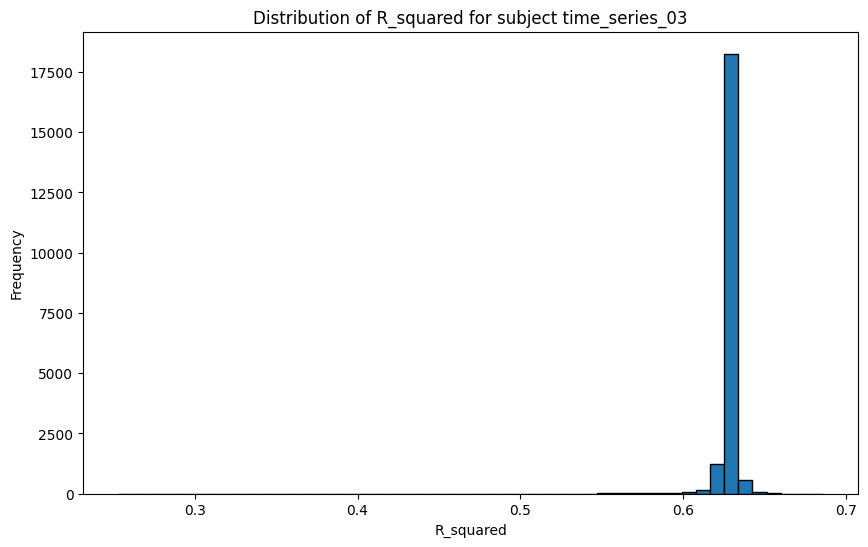

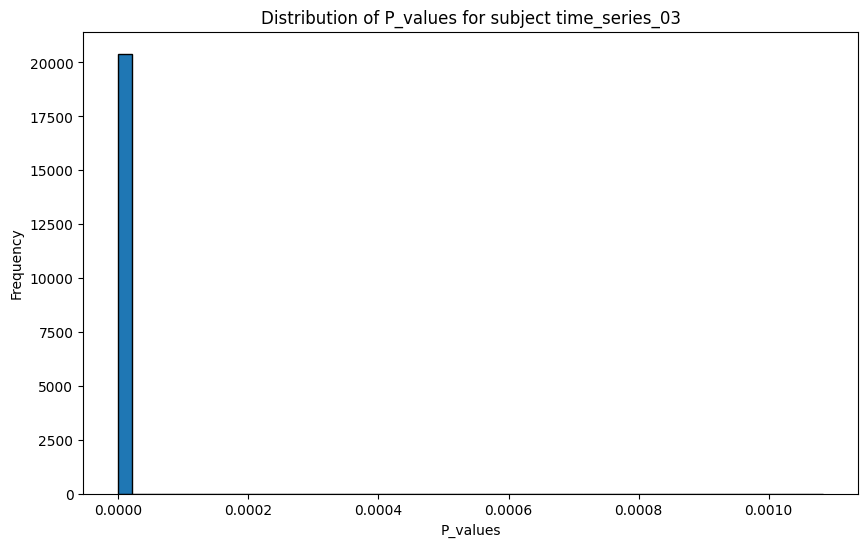

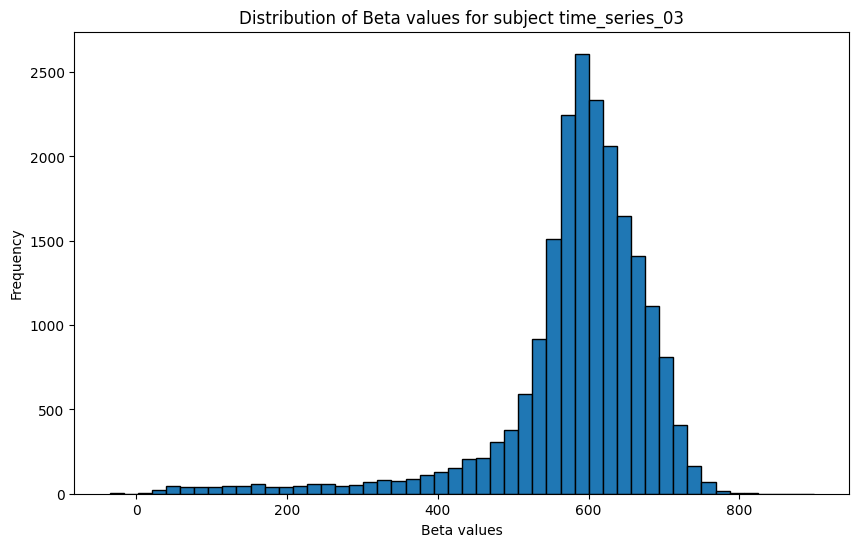

In [29]:
# Tracer les R² pour un sujet spécifique
plt.figure(figsize=(10, 6))
plt.hist(subject_metrics['R_squared'], bins=50, edgecolor='black')
plt.xlabel('R_squared')
plt.ylabel('Frequency')
plt.title('Distribution of R_squared for subject time_series_03')
plt.show()

# Tracer les p-values pour un sujet spécifique
plt.figure(figsize=(10, 6))
plt.hist(subject_metrics['P_values'].apply(lambda x: x[0]), bins=50, edgecolor='black')
plt.xlabel('P_values')
plt.ylabel('Frequency')
plt.title('Distribution of P_values for subject time_series_03')
plt.show()

# Tracer les betas pour un sujet spécifique (premier coefficient)
plt.figure(figsize=(10, 6))
plt.hist(subject_metrics['Betas'].apply(lambda x: x[0]), bins=50, edgecolor='black')
plt.xlabel('Beta values')
plt.ylabel('Frequency')
plt.title('Distribution of Beta values for subject time_series_03')
plt.show()


In [ ]:
# # Normalization of data between -1 and 1 directly in results_betas
# for key in results_betas:
#     data = results_betas[key]
#     min_val = np.min(data)
#     max_val = np.max(data)
#     results_betas[key] = 2 * (data - min_val) / (max_val - min_val) - 1

# # Example to check normalized data
# for key, value in results_betas.items():
#     print(f'{key}: min {np.min(value)}, max {np.max(value)}')

subj_03: min -1.0, max 1.0


Post-processing of betas: application of a z-map

In [30]:
import numpy as np
from scipy.stats import zscore

# Apply a z-score on the betas
def apply_zscore(betas):
    return zscore(betas, axis=0)

# Apply the z-score on the betas for each subject
results_betas_zscored = {
    subject: apply_zscore(betas)
    for subject, betas in results_betas.items()
}

# Example to check the contents of the new dictionary with z-score applied
for key, value in results_betas_zscored.items():
    print(f'{key}: {value}')

# Show a small part of the results to check
for key in results_betas_zscored:
    print(f'{key} z-scored betas:', results_betas_zscored[key][:5])  # Shows first 5 items to check

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
subj_03: [[-0.32356608  0.5084972  -0.35276246 ... -0.08479408  0.22980525
  -0.2867175 ]
 [-0.66839314  0.52501965 -0.21438561 ...  0.12953886 -0.06684028
  -0.12164906]
 [-0.3735998   0.06754835  0.15412068 ... -0.06697512  0.39148408
  -0.46004686]
 ...
 [-0.5964865   0.73441553 -0.681907   ... -0.52771086  0.411798
  -0.22155376]
 [-0.6447296   0.34929055 -0.1845259  ... -0.92854387  0.8753502
  -1.218743  ]
 [-0.30239132 -0.00958834 -0.13514975 ... -1.0396755   1.0074002
  -0.74793494]]
subj_05: [[ 0.4423427  -0.63917583  0.4094324  ... -0.7296739   0.66210365
  -1.0145937 ]
 [ 0.963617   -0.45196685  0.0615139  ... -0.70064896 -0.1973404
   1.0037396 ]
 [ 0.51127064  0.16662328 -0.49061108 ... -0.04595687 -0.12857829
   0.6011527 ]
 ...
 [ 0.74972373 -0.84946406  0.95765895 ...  0.71370965 -0.4306492
  -0.21065348]
 [ 0.90586656 -0.7764492 

In [31]:
results_betas_zscored['subj_03'].shape

(20413, 968)

In [32]:
# Transposer les données dans results_betas
for key in results_betas_zscored:
    results_betas_zscored[key] = np.transpose(results_betas_zscored[key])

# Exemple pour vérifier les nouvelles formes des données
for key, value in results_betas_zscored.items():
    print(f'{key}: shape {value.shape}')

subj_03: shape (968, 20413)
subj_05: shape (968, 20413)
subj_06: shape (968, 20413)
subj_07: shape (968, 20413)


In [33]:
results_betas_zscored['subj_01']

KeyError: 'subj_01'

In [36]:
# Creates a mask to know the indices of the last 2 points of each video, corresponding to a blank screen so we must delete them


# subject_numbers = [1]

# Dictionary to store indices
indices_suppr = {}

for subj_num in subject_numbers:
    key = f'time_series_0{subj_num}'
    new_key = f'subj_0{subj_num}'
    
    if key in time_series_labels:
        # List to store clues for the current topic
        subj_indices = []
        
        # Continuous index for points
        current_index = 0
        
        # Processing of the two runs
        for i in range(2):
            df = time_series_labels[key][i]
            
            # Add a 'next_label' column to store the label of the next line
            df['next_label'] = df['labels'].shift(-1)
            
            # Add a 'pts_nb_extract' column initialized with 'pts_nb'
            df['pts_nb_extract'] = df['pts_nb']
            
            # Filter lines where 'labels' is 'No Risk' or 'Risk'
            filtered_df = df[df['labels'].isin(['Risk', 'NonRisk'])]

            # Calculate continuous indices
            for idx, row in filtered_df.iterrows():
                pts_nb = row['pts_nb']
                line_indices = list(range(current_index, current_index + pts_nb))
                current_index += pts_nb
                
                # Store the indices of the last 2 points only if the next line is 'control' or does not exist, as we have split some videos into Risk and NonRisk, we remove the last 2 points only if the following line is control
                if row['next_label'] == 'control' or pd.isna(row['next_label']):
                    subj_indices.extend(line_indices[-2:])
                    
                    # Update 'pts_nb_extract' to 'pts_nb - 2' for this row
                    df.at[idx, 'pts_nb_extract'] = pts_nb - 2
        
        # Store in dictionary
        indices_suppr[new_key] = subj_indices

# Example to check the contents of the dictionary
for key, value in indices_suppr.items():
    print(f'{key}: {value}')

subj_03: [23, 24, 37, 38, 43, 44, 57, 58, 74, 75, 81, 82, 92, 93, 109, 110, 133, 134, 158, 159, 165, 166, 172, 173, 191, 192, 201, 202, 222, 223, 233, 234, 241, 242, 262, 263, 271, 272, 294, 295, 304, 305, 314, 315, 328, 329, 338, 339, 356, 357, 365, 366, 386, 387, 393, 394, 412, 413, 427, 428, 436, 437, 446, 447, 460, 461, 480, 481, 499, 500, 515, 516, 525, 526, 540, 541, 555, 556, 574, 575, 583, 584, 590, 591, 602, 603, 615, 616, 632, 633, 641, 642, 647, 648, 655, 656, 671, 672, 688, 689, 699, 700, 707, 708, 722, 723, 762, 763, 780, 781, 791, 792, 808, 809, 821, 822, 830, 831, 837, 838, 851, 852, 865, 866, 883, 884, 899, 900, 914, 915, 923, 924, 930, 931, 945, 946, 953, 954, 966, 967]
subj_05: [23, 24, 37, 38, 43, 44, 57, 58, 74, 75, 81, 82, 92, 93, 109, 110, 133, 134, 158, 159, 165, 166, 172, 173, 191, 192, 201, 202, 222, 223, 233, 234, 241, 242, 262, 263, 271, 272, 294, 295, 304, 305, 314, 315, 328, 329, 338, 339, 356, 357, 365, 366, 386, 387, 393, 394, 412, 413, 427, 428, 436, 437

In [31]:
len(indices_suppr['subj_01'])

KeyError: 'subj_01'

In [37]:
# Dictionary to store filtered results
results_betas_filtered = {}

# Browse each topic in indices_suppr
for subj_key, indices_to_remove in indices_suppr.items():
    # Get data from results_betas for this topic
    data = results_betas_zscored[subj_key]
    
    # Convert indices to be removed into a set for faster searching
    indices_to_remove_set = set(indices_to_remove)
    
    # Create a mask for the lines to keep (True = keep, False = delete)
    mask = np.array([i not in indices_to_remove_set for i in range(data.shape[0])])
    
    # Apply mask to get filtered data
    filtered_data = data[mask]
    
    # Store filtered data in the new dictionary
    results_betas_filtered[subj_key] = filtered_data

# Example to check new forms of data
for key, value in results_betas_filtered.items():
    print(f'{key}: shape {value.shape}')

subj_03: shape (828, 20413)
subj_05: shape (828, 20413)
subj_06: shape (828, 20413)
subj_07: shape (828, 20413)


In [38]:
import os
# Loop through each subject in results_betas
for subj_num in subject_numbers:
    key = f'subj_0{subj_num}'
    data = results_betas_filtered[key]

    # Ensure the directory exists for each subject
    directory = rf"D:\MiB\MiB2\data\natural-scenes-dataset\webdataset_avg_split\train\subj0{subj_num}"
    os.makedirs(directory, exist_ok=True)

    # Loop through each line in the data matrix
    for j in range(data.shape[0]):
        line = data[j, :]
        
        # Duplicate the line 3 times
        duplicated_lines = np.tile(line, (3, 1))
        
        # Save to .npy file with the specified naming convention
        file_name = os.path.join(directory, f"sample00000000{j}.nsdgeneral.npy")
        np.save(file_name, duplicated_lines)

    print(f"Files saved for subject {subj_num} in directory {directory}")

Files saved for subject 3 in directory D:\MiB\MiB2\data\natural-scenes-dataset\webdataset_avg_split\train\subj03
Files saved for subject 5 in directory D:\MiB\MiB2\data\natural-scenes-dataset\webdataset_avg_split\train\subj05
Files saved for subject 6 in directory D:\MiB\MiB2\data\natural-scenes-dataset\webdataset_avg_split\train\subj06
Files saved for subject 7 in directory D:\MiB\MiB2\data\natural-scenes-dataset\webdataset_avg_split\train\subj07


Picture preparation

In [30]:
sum(time_series_labels['time_series_01'][0]['pts_nb_extract'])

KeyError: 'time_series_01'

In [66]:
#subject_numbers = [3, 5, 6, 7, 8]
# subject_numbers = [1]

# Nouveau dictionnaire pour stocker les lignes filtrées
time_series_R_NR = {}

# Parcourir chaque sujet dans time_series_labels
for subj_num in subject_numbers:
    key = f'time_series_0{subj_num}'
    
    if key in time_series_labels:
        # Liste pour stocker les DataFrames filtrés pour chaque run
        filtered_runs = []
        
        # Traitement des deux runs
        for i in range(2):
            df = time_series_labels[key][i]
            
            # Filtrer les lignes où 'labels' est 'NonRisk' ou 'Risk'
            filtered_df = df[df['labels'].isin(['Risk', 'NonRisk'])]
            
            # Ajouter le DataFrame filtré à la liste
            filtered_runs.append(filtered_df)
        
        # Stocker la liste des DataFrames filtrés dans le nouveau dictionnaire
        time_series_R_NR[f'subj_0{subj_num}'] = filtered_runs

# Exemple pour vérifier le contenu du nouveau dictionnaire
for key, value in time_series_R_NR.items():
    print(f'{key}:')
    for run in value:
        print(run)

subj_03:
     labels                                        time_series  \
1   NonRisk  [[624.8204956054688, 625.0413818359375, 627.09...   
3   NonRisk  [[634.0695190429688, 631.7698974609375, 642.97...   
5      Risk  [[637.9580078125, 644.0554809570312, 637.38244...   
7   NonRisk  [[644.48486328125, 640.9273681640625, 633.1108...   
9   NonRisk  [[642.2381591796875, 648.8755493164062, 643.02...   
11  NonRisk  [[648.3121337890625, 647.6222534179688, 646.45...   
13  NonRisk  [[639.5354614257812, 640.52587890625, 648.9931...   
15  NonRisk  [[640.2239379882812, 647.8937377929688, 643.41...   
17  NonRisk  [[640.2732543945312, 636.6780395507812, 645.36...   
19  NonRisk  [[652.3006591796875, 648.575927734375, 644.949...   
21     Risk  [[639.9872436523438, 638.3902587890625, 636.60...   
23     Risk  [[644.3914184570312, 648.1484375, 638.17346191...   
25  NonRisk  [[645.3316650390625, 648.3984375, 637.27374267...   
27  NonRisk  [[639.5390014648438, 635.6473999023438, 636.15...   
2

In [67]:
sum(time_series_R_NR['subj_05'][0]['pts_nb_extract'])

431

In [68]:
from moviepy import VideoFileClip
import os
import cv2

subject_numbers = [3, 5, 6, 7, 8]
# subject_numbers = [1]
video_folder = r"E:\experiment\datavid_tot"

grouped_videos_per_subject = {f'subj_0{subj_num}': {} for subj_num in subject_numbers}

for subj_key, runs in time_series_R_NR.items():
    for run in runs:
        for idx, row in run.iterrows():
            video_name = row['video_name']
            pts_nb_extract = row['pts_nb_extract']
            if video_name in grouped_videos_per_subject[subj_key]:
                grouped_videos_per_subject[subj_key][video_name] += pts_nb_extract
            else:
                grouped_videos_per_subject[subj_key][video_name] = pts_nb_extract

for subj_num in subject_numbers:
    subj_key = f'subj_0{subj_num}'
    save_folder = fr"D:\MiB\MindBridge\data\natural-scenes-dataset\webdataset_avg_split\train\subj0{subj_num}"
    os.makedirs(save_folder, exist_ok=True)
    
    frame_index = 0
    
    for video_name, total_frames in grouped_videos_per_subject[subj_key].items():
        video_path = os.path.join(video_folder, video_name)
        # video_path = os.path.join(video_folder)
        
        if not os.path.exists(video_path):
            print(f"Error: Video file {video_name} not found at {video_path}.")
            continue
        
        try:
            clip = VideoFileClip(video_path)
            duration = clip.duration
            frame_times = [t * duration / total_frames for t in range(total_frames)]
            
            frames_extracted = 0
            for t in frame_times:
                frame = clip.get_frame(t)
                frame_name = os.path.join(save_folder, f"sample00000000{frame_index}.jpg")
                frame_index += 1
                frames_extracted += 1
                
                # Convert frame to image
                frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
                cv2.imwrite(frame_name, frame_bgr)
            
            print(f"Extracted {frames_extracted} frames out of {total_frames} requested from {video_name}.")
        
        except Exception as e:
            print(f"Error processing video {video_name}: {e}")

print("Frames extraction and saving completed.")


Extracted 37 frames out of 37 requested from part 2 - 12 video 8_Trim.mp4.
Extracted 20 frames out of 20 requested from control 2 - video 4 _2_Trim.mp4.
Extracted 17 frames out of 17 requested from part 2 - 3 video 1_Trim.mp4.
Extracted 25 frames out of 25 requested from part 2 - 6 video 4_Trim.mp4.
Extracted 32 frames out of 32 requested from control 2 - video 1 _ 5_Trim.mp4.
Extracted 12 frames out of 12 requested from part 2 - 6 video 3_Trim.mp4.
Extracted 14 frames out of 14 requested from part 2 - 8 video 1_Trim.mp4.
Extracted 25 frames out of 25 requested from part 2 - 8 video 2_Trim.mp4.
Extracted 33 frames out of 33 requested from control 2 - video 2 _ 3_Trim.mp4.
Extracted 38 frames out of 38 requested from control 2 - video 1 _ 4.mp4.
Extracted 12 frames out of 12 requested from part 2 - 11 video 7_Trim.mp4.
Extracted 9 frames out of 9 requested from part 2 - 9 video 1_Trim.mp4.
Extracted 23 frames out of 23 requested from part 2 - 11 video 3_Trim.mp4.
Extracted 22 frames out

In [69]:
import cv2
import os
# Chemin vers le dossier contenant les images

for i in subject_numbers:
    file_path = rf"D:\MiB\MindBridge\data\natural-scenes-dataset\webdataset_avg_split\train\subj0{i}"

    # Parcourir le dossier
    for filename in os.listdir(file_path):
        if filename.endswith(".jpg"):  # Vérifier si le fichier est une image .jpg
            image_path = os.path.join(file_path, filename)
            img = cv2.imread(image_path)  # Charger l'image
            if img is not None:
                resized_img = cv2.resize(img, (256, 256))  # Redimensionner l'image à 256x256
                cv2.imwrite(image_path, resized_img)  # Sauvegarder l'image redimensionnée

    print("All .jpg images have been resized to 256x256.")

All .jpg images have been resized to 256x256.
All .jpg images have been resized to 256x256.
All .jpg images have been resized to 256x256.
All .jpg images have been resized to 256x256.
All .jpg images have been resized to 256x256.


Create Coco index files: .coco73k.npy

In [41]:
import pandas as pd
import numpy as np
import os

# Path to the CSV file
csv_file_path = r"D:\MiB\MindBridge\data\natural-scenes-dataset\nsddata\experiments\nsd\nsd_stim_info_merged_1.csv"

# Load the CSV file
df = pd.read_csv(csv_file_path, sep=';')

subject_numbers = [3, 5, 6, 7]

for i in subject_numbers:
    # Directory to save the .npy files
    save_directory = rf'D:\MiB\MiB2\data\natural-scenes-dataset\webdataset_avg_split\train\subj0{i}'

    # Ensure the directory exists
    os.makedirs(save_directory, exist_ok=True)

    # Process the rows starting from the index 73002
    for index, row in df.iloc[73000:].iterrows():
        coco_id = row['cocoId']
        sample_number = row['Unnamed: 0']
        # Compute the correct index for the filename
        file_index = coco_id - 1000000
        file_name = f'sample00000000{file_index}.coco73k.npy'
        file_path = os.path.join(save_directory, file_name)
        
        # Save the sample number in a .npy file
        np.save(file_path, [sample_number])
        np.save(file_path, [sample_number])

    print("Files have been created successfully.")


Files have been created successfully.
Files have been created successfully.
Files have been created successfully.
Files have been created successfully.


In [42]:
import os
from collections import defaultdict

for i in subject_numbers:
    # Directory containing the samples
    root_dir = rf'D:\MiB\MiB2\data\natural-scenes-dataset\webdataset_avg_split\train\subj0{i}'

    # Dictionary to count occurrences of each file type per sample
    file_count = defaultdict(lambda: {'nsdgeneral': 0, 'jpg': 0, 'coco73k': 0})

    # Traverse the directory and count file types
    for file in os.listdir(root_dir):
        if file.endswith('.nsdgeneral.npy') or file.endswith('.jpg') or file.endswith('.coco73k.npy'):
            sample_id = file.split('.')[0]
            if file.endswith('.nsdgeneral.npy'):
                file_count[sample_id]['nsdgeneral'] += 1
            elif file.endswith('.jpg'):
                file_count[sample_id]['jpg'] += 1
            elif file.endswith('.coco73k.npy'):
                file_count[sample_id]['coco73k'] += 1

    # Identify and print samples with more than one 'nsdgeneral' file
    extra_nsdgeneral_samples = [sample_id for sample_id, counts in file_count.items() if counts['nsdgeneral'] > 1]

    print("Samples with more than one 'nsdgeneral' file:")
    for sample_id in extra_nsdgeneral_samples:
        print(f"{sample_id}: {file_count[sample_id]}")

    # Optionally, print all counts for inspection
    print("\nAll file counts per sample:")
    for sample_id, counts in file_count.items():
        print(f"{sample_id}: {counts}")


Samples with more than one 'nsdgeneral' file:

All file counts per sample:
sample000000000: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample000000001: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample000000002: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample000000003: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample000000004: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample000000005: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample000000006: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample000000007: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample000000008: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample000000009: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample0000000010: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample0000000011: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample0000000012: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample0000000013: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample0000000014: {'nsdgeneral': 1, 'jpg': 0, 'coco73k': 1}
sample0000000015: {'nsdgeneral': 1,

In [45]:
import numpy as np

# Charger le fichier .npy
data = np.load(r"D:\MiB\MiB2\data\natural-scenes-dataset\webdataset_avg_split\train\subj03\sample00000000593.coco73k.npy", allow_pickle=True)

# Afficher son type et contenu
print(type(data))
print(data)


<class 'numpy.ndarray'>
[1000593]
